# Dataset Information

###  This datasets contains 8732 labeled sounds of Urban Sounds from 10 classes:

0 = air_conditioner

1 = car_horn

2 = children_playing

3 = dog_bark

4 = drilling

5 = engine_idling

6 = gun_shot

7 = jackhammer

8 = siren

9 = street_music

In [136]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
from tqdm import tqdm
import IPython
import math
import pickle
import random
from datetime import datetime
import os
import librosa
import librosa.display
import glob 
import skimage

In [137]:
from keras import backend as keras_backend
from keras.models import Sequential, load_model
from keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
df = pd.read_csv("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/metadata/UrbanSound8K.csv")
df.shape

(8732, 8)

In [139]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [141]:
df["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [142]:
appended = []
for i in range(1,11):
    appended.append(df[df.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [143]:
df['class'].value_counts(normalize=True)

dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/1074553733.py:7: FutureWarning: Pass y=[-0.   -0.01 -0.   ... -0.   -0.   -0.  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mfcc=100)


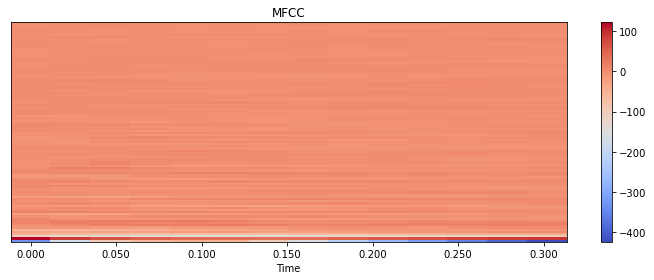

In [144]:
import os
import IPython.display as ipd
ipd.Audio('C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold9/101729-0-0-18.wav')

#MFCC 
y,sr=librosa.load("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=100)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

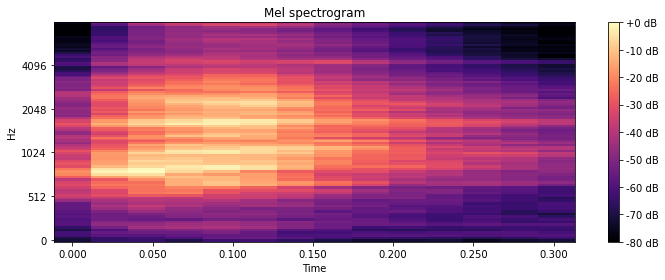

In [145]:
#Melspectrogram
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=100,fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

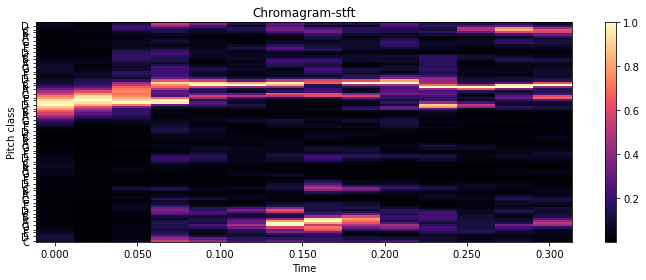

In [146]:
# Chroma_stft
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=100)
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram-stft')
plt.tight_layout()

In [147]:
y,sr=librosa.load("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold5/100032-3-0-0.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=100).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=100,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=100).T,axis=0)
# tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sr).T,axis=0)
# melspectrogram.shape,chroma_stft.shape,contrast.shape,tonnetz.shape,mfccs.shape
mfccs.shape,melspectrogram.shape,chroma_stft.shape

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/4068896919.py:2: FutureWarning: Pass y=[-0.   -0.01 -0.   ... -0.   -0.   -0.  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=100).T,axis=0)


((100,), (100,), (100,))

In [148]:
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft)),(100,3))
features.shape

(100, 3)

In [149]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]

path="C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold"
for i in tqdm(range(len(df))):
    fold_no=str(df.iloc[i]["fold"])
    file=df.iloc[i]["slice_file_name"]
    label=df.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=100,fmax=8000).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft)),(100,3))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

 41%|███████████████████████████████▊                                              | 3555/8732 [05:49<08:10, 10.55it/s]C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
 95%|██████████████████████████████████████████████████████████████████████████▎   | 8325/8732 [13:09<00:25, 16.18it/s]C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [13:42<00:00, 10.62it/s]


In [150]:
x=x_train+x_test
y=y_train+y_test

x=np.array(x)
y=np.array(y)
x.shape,y.shape

((8732, 100, 3), (8732,))

In [151]:
x_2d=np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
x_2d.shape

np.savetxt("x.csv", x_2d, delimiter=",")
np.savetxt("y.csv",y,delimiter=",")
x_2d.shape

(8732, 300)

In [152]:
ndexes = []
total = len(df)
indexes = list(range(0, total))


random.shuffle(indexes)

test_split_pct = 20
split_offset = math.floor(test_split_pct * total / 100)

test_split_idx = indexes[0:split_offset]
train_split_idx = indexes[split_offset:total]


X_test = np.take(x, test_split_idx, axis=0)
y_test = np.take(y, test_split_idx, axis=0)
X_train = np.take(x, train_split_idx, axis=0)
y_train = np.take(y, train_split_idx, axis=0)

test = df.iloc[test_split_idx]
train = df.iloc[train_split_idx]

print("Test split: {} \t\t Train split: {}".format(len(test), len(train)))
print("X test shape: {} \t X train shape: {}".format(X_test.shape, X_train.shape))
print("y test shape: {} \t\t y train shape: {}".format(y_test.shape, y_train.shape))

Test split: 1746 		 Train split: 6986
X test shape: (1746, 100, 3) 	 X train shape: (6986, 100, 3)
y test shape: (1746,) 		 y train shape: (6986,)


In [153]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((6986, 10), (1746, 10))

In [154]:
X_train=np.reshape(X_train,(X_train.shape[0], 100,3))
X_test=np.reshape(X_test,(X_test.shape[0], 100,3))
X_train.shape,X_test.shape

((6986, 100, 3), (1746, 100, 3))

In [155]:
X_train=np.reshape(X_train,(X_train.shape[0], 100,3,1))
X_test=np.reshape(X_test,(X_test.shape[0], 100,3,1))
X_train.shape,X_test.shape

((6986, 100, 3, 1), (1746, 100, 3, 1))

In [156]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model=Sequential()
model.add(Conv2D(64,kernel_size=3,strides=1,padding="Same",activation="relu",input_shape=(100,3,1)))
model.add(MaxPooling2D(padding="same"))
model.add(Conv2D(128,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history_relu=model.fit(X_train,y_train,batch_size=36,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
195/195 [==============================] - 7s 28ms/step - loss: 2.2415 - accuracy: 0.1928 - val_loss: 1.9391 - val_accuracy: 0.3322
Epoch 2/100
195/195 [==============================] - 5s 25ms/step - loss: 1.8935 - accuracy: 0.3331 - val_loss: 1.6664 - val_accuracy: 0.4129
Epoch 3/100
195/195 [==============================] - 5s 25ms/step - loss: 1.7254 - accuracy: 0.3942 - val_loss: 1.5324 - val_accuracy: 0.4679
Epoch 4/100
195/195 [==============================] - 5s 25ms/step - loss: 1.5986 - accuracy: 0.4413 - val_loss: 1.4108 - val_accuracy: 0.5109
Epoch 5/100
195/195 [==============================] - 5s 25ms/step - loss: 1.5011 - accuracy: 0.4818 - val_loss: 1.3286 - val_accuracy: 0.5407
Epoch 6/100
195/195 [==============================] - 5s 25ms/step - loss: 1.4415 - accuracy: 0.5072 - val_loss: 1.2922 - val_accuracy: 0.5670
Epoch 7/100
195/195 [==============================] - 5s 26ms/step - loss: 1.3503 - accuracy: 0.5394 - val_loss: 1.1555 - val_accuracy:

195/195 [==============================] - 6s 29ms/step - loss: 0.4986 - accuracy: 0.8375 - val_loss: 0.5347 - val_accuracy: 0.8333
Epoch 58/100
195/195 [==============================] - 5s 27ms/step - loss: 0.4836 - accuracy: 0.8374 - val_loss: 0.5827 - val_accuracy: 0.8408
Epoch 59/100
195/195 [==============================] - 6s 29ms/step - loss: 0.5044 - accuracy: 0.8378 - val_loss: 0.6309 - val_accuracy: 0.8310
Epoch 60/100
195/195 [==============================] - 5s 28ms/step - loss: 0.5084 - accuracy: 0.8311 - val_loss: 0.5775 - val_accuracy: 0.8396
Epoch 61/100
195/195 [==============================] - 5s 25ms/step - loss: 0.4644 - accuracy: 0.8445 - val_loss: 0.5587 - val_accuracy: 0.8259
Epoch 62/100
195/195 [==============================] - 5s 25ms/step - loss: 0.4664 - accuracy: 0.8474 - val_loss: 0.5487 - val_accuracy: 0.8414
Epoch 63/100
195/195 [==============================] - 6s 29ms/step - loss: 0.4450 - accuracy: 0.8546 - val_loss: 0.5327 - val_accuracy: 0.839

In [157]:
train_loss_score=model.evaluate(X_train,y_train)
test_loss_score=model.evaluate(X_test,y_test)
print(train_loss_score)
print(test_loss_score)

55/55 [==============================] - 0s 7ms/step - loss: 0.5301 - accuracy: 0.8459
[0.15711821615695953, 0.9477526545524597]
[0.5301483869552612, 0.8459335565567017]


In [158]:
y_probs = model.predict(X_test)

yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test, axis=1)

test['pred'] = yhat_probs

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/1832282416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = yhat_probs


In [159]:
np.set_printoptions(precision=2)

cm = confusion_matrix(y_trues, yhat_probs)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

re = classification_report(y_trues, yhat_probs, labels=[0,1,2,3,4,5,6,7,8,9], target_names=labels)

print(re)

                  precision    recall  f1-score   support

 Air Conditioner       0.86      0.96      0.90       198
        Car Horn       0.88      0.91      0.89        77
Children Playing       0.70      0.68      0.69       190
        Dog bark       0.88      0.72      0.79       214
        Drilling       0.91      0.84      0.87       227
   Engine Idling       0.91      0.89      0.90       195
        Gun Shot       0.89      0.81      0.85        72
      Jackhammer       0.88      0.95      0.91       225
           Siren       0.80      0.93      0.86       175
    Street Music       0.79      0.77      0.78       173

        accuracy                           0.85      1746
       macro avg       0.85      0.85      0.85      1746
    weighted avg       0.85      0.85      0.84      1746



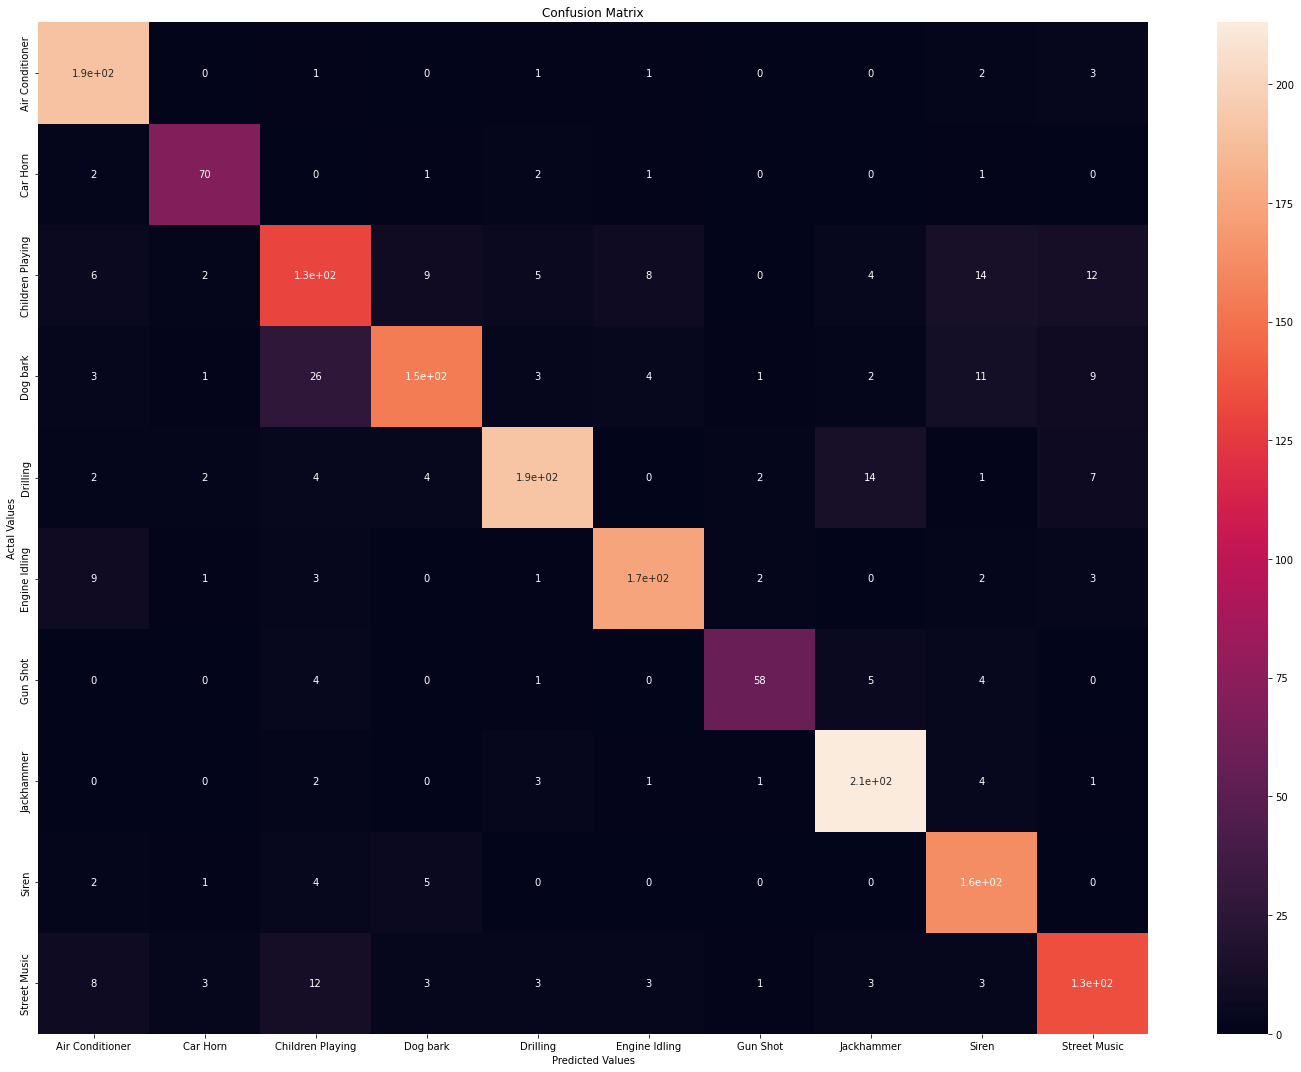

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'], 
                     columns = ['Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'])

#Plotting the confusion matrix
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

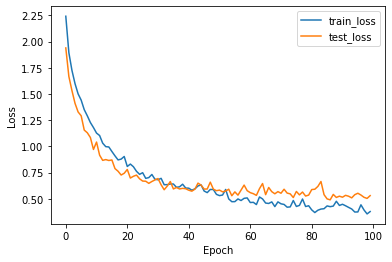

In [161]:
metrics = history_relu.history
plt.plot(history_relu.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

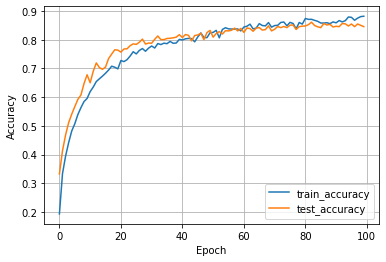

In [162]:
plt.plot(history_relu.history['accuracy'], label='train_accuracy')
plt.plot(history_relu.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [163]:
# Evaluate the performance
model.evaluate(X_test , y_test)

55/55 [==============================] - 0s 7ms/step - loss: 0.5301 - accuracy: 0.8459


[0.5301483869552612, 0.8459335565567017]

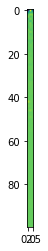

(100, 3, 1)


In [164]:
import tensorflow as tf
# Use the .imshow() function and show the plot
plt.imshow(( tf.squeeze(X_test[850]) ))

plt.show()
# Print the shape of the sample image
print(X_test[850].shape)


In [165]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[873].reshape(1,100,3,1))

# Print the prediction result
prediction_result

array([[1.03e-15, 1.00e+00, 6.28e-11, 1.96e-10, 6.01e-12, 4.41e-09,
        6.47e-14, 1.79e-14, 5.98e-13, 1.57e-11]], dtype=float32)

In [166]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

In [167]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability")

This image belongs to class 1 with 1.0 probability
